<a href="https://colab.research.google.com/github/Kontuzhenyi/AI_python/blob/main/%D0%BD%D0%B5%D1%81%D0%B1_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D1%871.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Небольшой описательный анализ.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Проверим на наличие пропусков в данных.

In [7]:
np.count_nonzero(df.isnull().sum(axis= 1).values)

0

Пропусков нет

Выведем названия столбцов.

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Оценим отношение классов целевой переменной.

In [9]:
# Подсчет количества уникальных значений в столбце Class
counts = df['Class'].value_counts()

# Общее количество записей
total = counts.sum()

# Вычисление процентов
percentage_0 = (counts.get(0, 0) / total) * 100
percentage_1 = (counts.get(1, 0) / total) * 100

# Вывод результата
print(f"Обычные транзакции составляют {percentage_0:.2f}% данных")
print(f"Мошеннические транзакции составляют {percentage_1:.2f}% данных")

Обычные транзакции составляют 99.83% данных
Мошеннические транзакции составляют 0.17% данных


In [10]:
# Подсчет количества 0 и 1
counts = df['Class'].value_counts()

# Доступ к количеству записей
count_0 = counts.get(0, 0)  # Количество 0
count_1 = counts.get(1, 0)  # Количество 1

print(f"Количество 0: {count_0}")
print(f"Количество 1: {count_1}")

Количество 0: 284315
Количество 1: 492


**Важно!**

Обратим внимание, насколько несбалансированным является наш исходный набор данных! Большинство транзакций не являются мошенническими. Если мы используем этот массив данных в качестве основы для наших моделей прогнозирования и анализа, мы можем получить много ошибок, поскольку наши алгоритмы будут предполагать, что все транзакции не являются мошенничеством. Нам же критически важно сконцентрироваться именно на мошенниках.

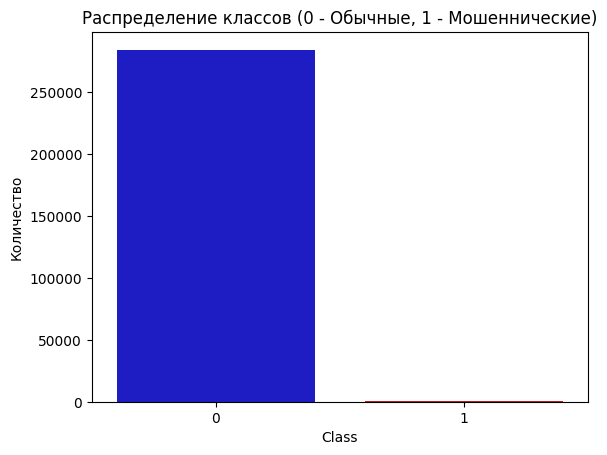

In [11]:
colors = ["#0101DF", "#DF0101"]

# Построение гистограммы
sns.countplot(data=df, x='Class', palette=colors)

# Добавляем подписи и заголовок
plt.title('Распределение классов (0 - Обычные, 1 - Мошеннические)')
plt.xlabel('Class')
plt.ylabel('Количество')

# Отображение графика
plt.show()

Построим распределения по суммам и времени транзакций.

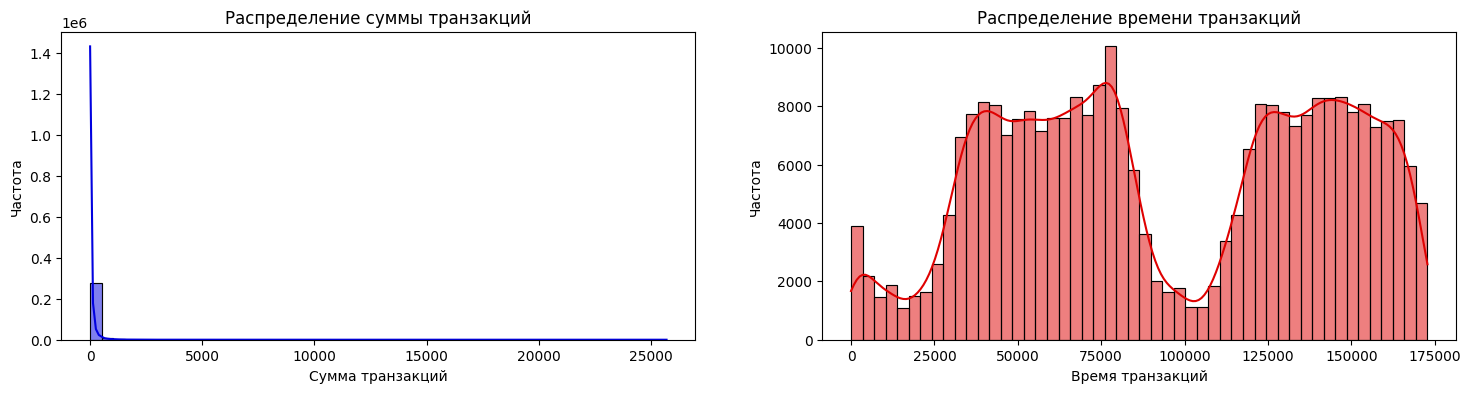

In [12]:
# Извлекаем значения столбцов Amount и Time
amount_val = df['Amount']  # Суммы транзакций
time_val = df['Time']      # Время транзакций

# Создаем фигуру с двумя графиками
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# График распределения суммы транзакций
sns.histplot(amount_val, kde=True, bins=50, color="#0101DF", ax=ax[0])
ax[0].set_title("Распределение суммы транзакций")
ax[0].set_xlabel("Сумма транзакций")
ax[0].set_ylabel("Частота")

# График распределения времени транзакций
sns.histplot(time_val, kde=True, bins=50, color="#DF0101", ax=ax[1])
ax[1].set_title("Распределение времени транзакций")
ax[1].set_xlabel("Время транзакций")
ax[1].set_ylabel("Частота")

# Отображаем графики
plt.show()

### Масштабирование
Первым делом нам необходимо отмасштабировать столбцы **Time** и **Amount**. Поскольку все остальные признаки уже отмасштабированы. Однако делать это нужно только строго **после** разбиения на обучающую выборку и тестовую.

Затем необходимо создать подвыборку из наших данных, чтобы иметь равное количество случаев мошенничества и не мошенничества, что поможет нашим моделям лучше понять закономерности, определяющие, является ли транзакция мошенничеством или нет.

### Зачем создавать подвыборку?
Наши данные имеют сильный дисбаланс. Использование исходного датасета приведет к следующим проблемам:
  - **Переобучение**: Наши модели классификации будут предполагать, что в большинстве случаев мошенничества не существует! Мы хотим, чтобы наша модель точно определяла, когда происходит мошенничество.
  - **Неверные корреляции:** Хотя мы не знаем, что обозначают признаки "V", будет полезно понять, как каждый из этих признаков влияет на результат (мошенничество или отсутствие мошенничества), поскольку, имея несбалансированный набор данных, мы не можем увидеть истинные корреляции между целевой переменной и признаками.

### Разделение данных
**Важно!**

Прежде, чем приступить к балансировке наших данных, мы должны разделить исходный набор данных. Зачем?

Для определения качества работы наших моделей их необходимо тестировать на **исходном** тестовом наборе, а не на тестовом наборе, созданном после балансировки. Цель балансировки заключается в том, чтобы модель смогла найти закономерности для принятия решения по типу транзакции, поэтому мы выравниваем соотношение между мошенническими транзакциями и обычными. Однако проверять качество мы будем именно в "боевых" условиях с учетом реального распределения данных.




In [13]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# вот последнее представление - как раз то, что нужно для RobustScaler . Преобразовываем так все нужные столбцы.

original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


## Метод Random Under-Sampling

Применим метод *Random Under-Sampling*, который случайным образом удаляет объекты доминирующего класса и выравнивает соотношение классов.

#### Алгоритм:
<ul>
<li>Определяем степень несбалансированности (посчитали количество меток одного и другого класса выше)  </li>
<li>Как только мы определим, сколько случаев считаются мошенническими операциями (Fraud = "1"), мы должны довести количество немошеннических операций до того же количества, что и мошеннических (мы хотим получить соотношение 50/50 между классами), то есть это в подвыборке будет 492 случая мошенничества и 492 случая немошеннических операций.  </li>
<li> После применения этого метода мы получим подвыборку нашего набора данных с соотношением 50/50 в отношении наших классов. Наконец, не забудем <b>перемешать</b> наши данные для того, чтобы модели не зависили от порядка входных данных.</li>
</ul>

**Важно!**

Основная проблема данного метода заключается в том, что мы рискуем тем, что наши модели классификации не будут работать так точно, как нам хотелось бы, поскольку происходит большая потеря информации (выделение всего 492 немошеннических транзакций из 284 315 немошеннических транзакций).

In [14]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65242,51495.0,-1.441080,0.768762,2.823299,-1.120695,-1.243611,-0.494978,-0.205882,0.649633,0.711105,...,0.031394,0.315930,-0.226303,1.007840,0.434157,0.624550,0.115979,0.060226,11.39,0
213092,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
213134,139124.0,-2.759589,2.952294,-0.246753,2.285075,1.480641,-0.418159,0.982111,0.462952,-0.965629,...,-0.659998,-1.613286,-0.578626,-0.703586,0.811250,-0.294006,0.467931,0.030362,4.37,0
63421,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
15810,27252.0,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1


In [15]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_full.csv")

In [16]:
new_df.shape

(984, 31)

In [17]:
# Подсчет количества 0 и 1
counts = new_df['Class'].value_counts()

# Доступ к количеству записей
count_0 = counts.get(0, 0)  # Количество 0
count_1 = counts.get(1, 0)  # Количество 1

print(f"Количество 0: {count_0}")
print(f"Количество 1: {count_1}")

Количество 0: 492
Количество 1: 492


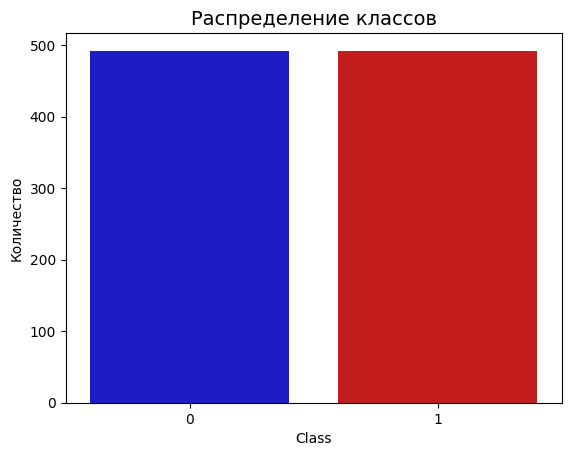

In [18]:
# Построение гистограммы
sns.countplot(data=new_df, x='Class', palette=colors)

# Добавляем подписи и заголовок
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Количество')

# Отображение графика
plt.show()

### Матрица корреляций

Корреляционные матрицы очень важны для понимания данных. Мы хотим узнать, есть ли признаки, которые оказывают сильное влияние на то, является ли конкретная транзакция мошенничеством. Однако важно, чтобы мы использовали сбалансированную подвыборку, чтобы увидеть, какие признаки имеют высокую положительную или отрицательную корреляцию в отношении мошеннических операций.

Text(0.5, 1.0, 'Матрица корреляций сбалансированной подвыборки')

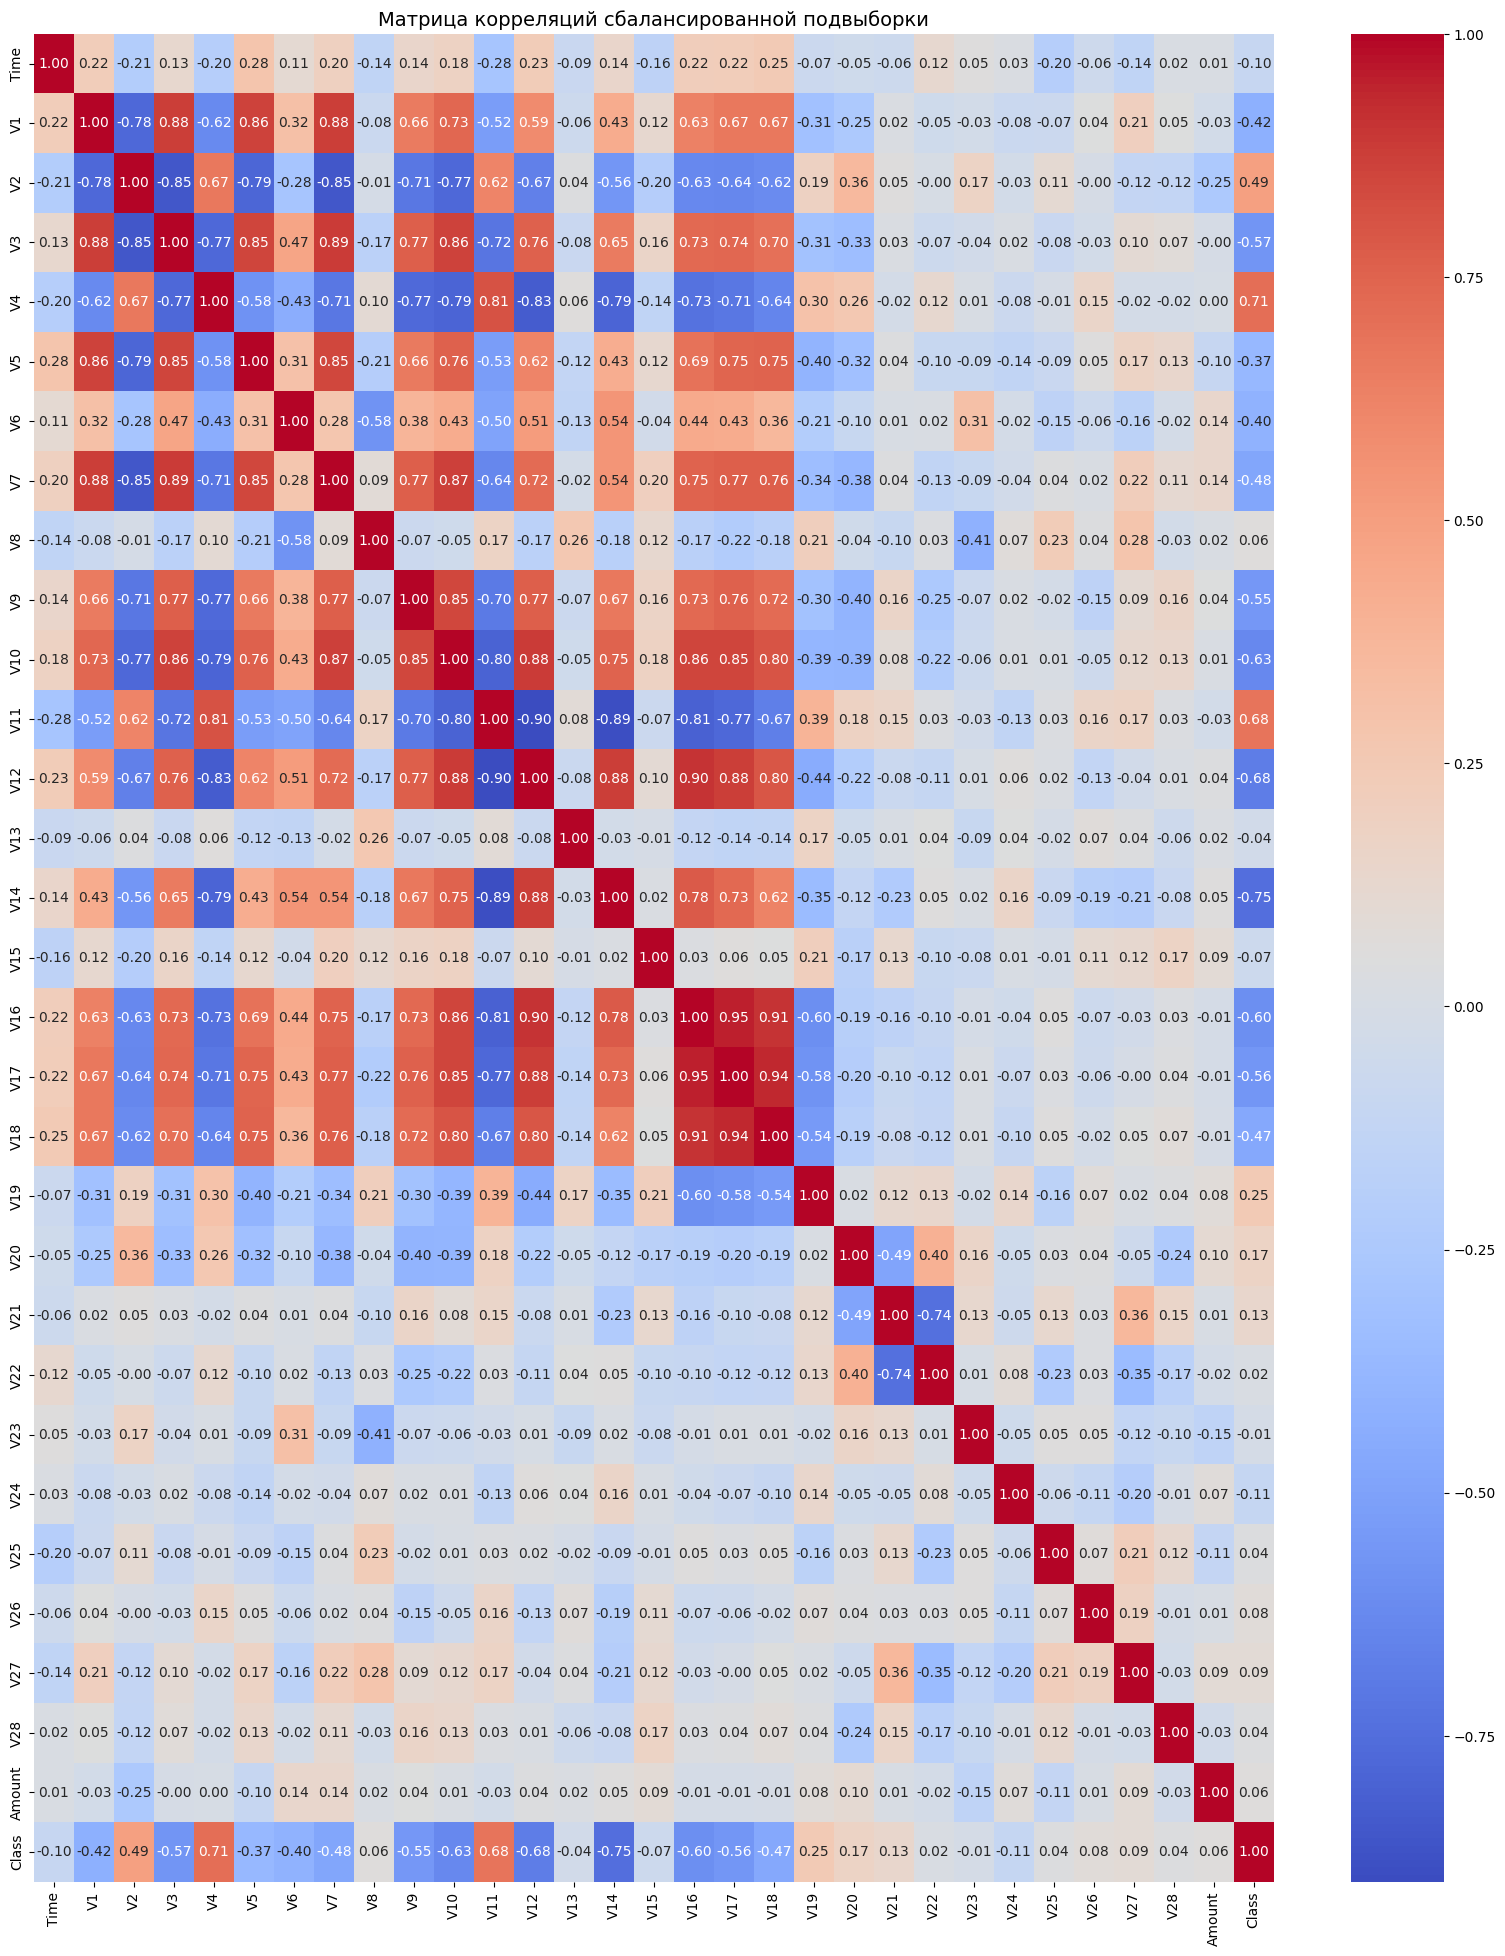

In [19]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))

# Построим матрицу корреляций

correlation_matrix = new_df.corr()  # Вычисляем матрицу корреляций
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax, cbar=True)

ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

### Выводы:
<ul>
<li><b>Отрицательные корреляции: </b>V10, V12, V14, V16 Другими словами, чем ниже эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция.  </li>
<li> <b> Положительные корреляции: </b> V2, V4, V11, V19. То есть, чем выше эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция. </li>
</ul>


**Важно!**

Всегда проверяйте, используете ли вы сбалансированную подвыборку в корреляционной матрице, иначе на корреляционную матрицу повлияет сильный дисбаланс между классами.

Построим теперь Boxplot.

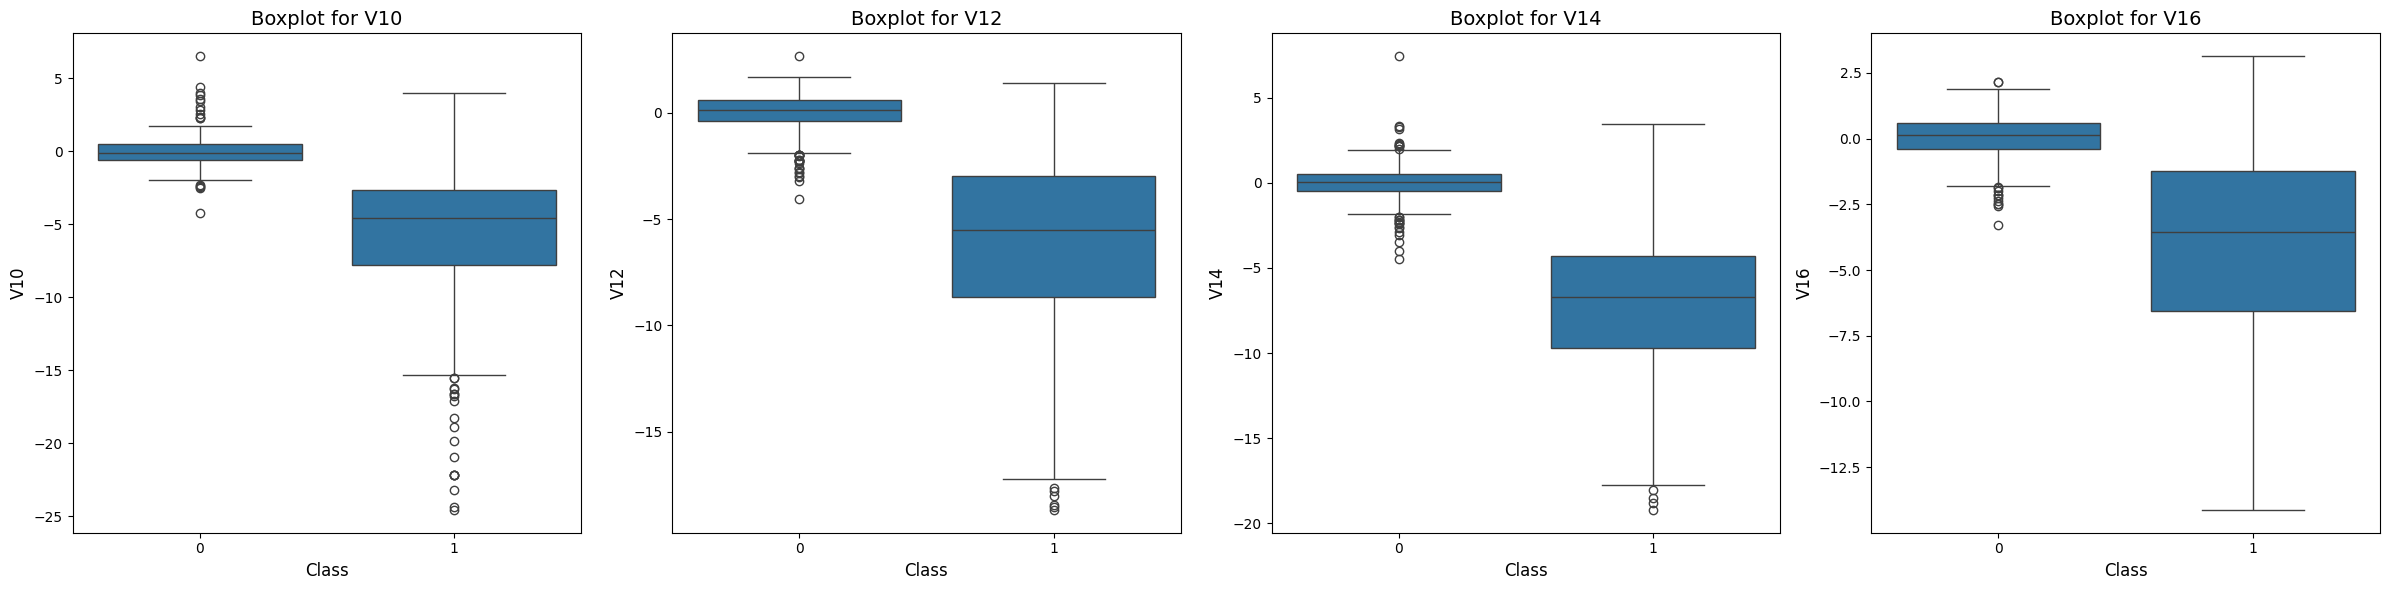

In [20]:
# Признаки с отрицательной корреляцией
negative_corr_features = ['V10', 'V12', 'V14', 'V16']

# Создаем фигуру и оси для 4 графиков в одной строке
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Строим boxplot для каждого признака
for idx, feature in enumerate(negative_corr_features):
    sns.boxplot(data=new_df, x='Class', y=feature, ax=axes[idx])  # Boxplot для текущего признака
    axes[idx].set_title(f"Boxplot for {feature}", fontsize=14)  # Заголовок графика
    axes[idx].set_xlabel("Class", fontsize=12)  # Подпись оси X
    axes[idx].set_ylabel(feature, fontsize=12)  # Подпись оси Y

plt.tight_layout()  # Уменьшить промежутки между графиками
plt.show()


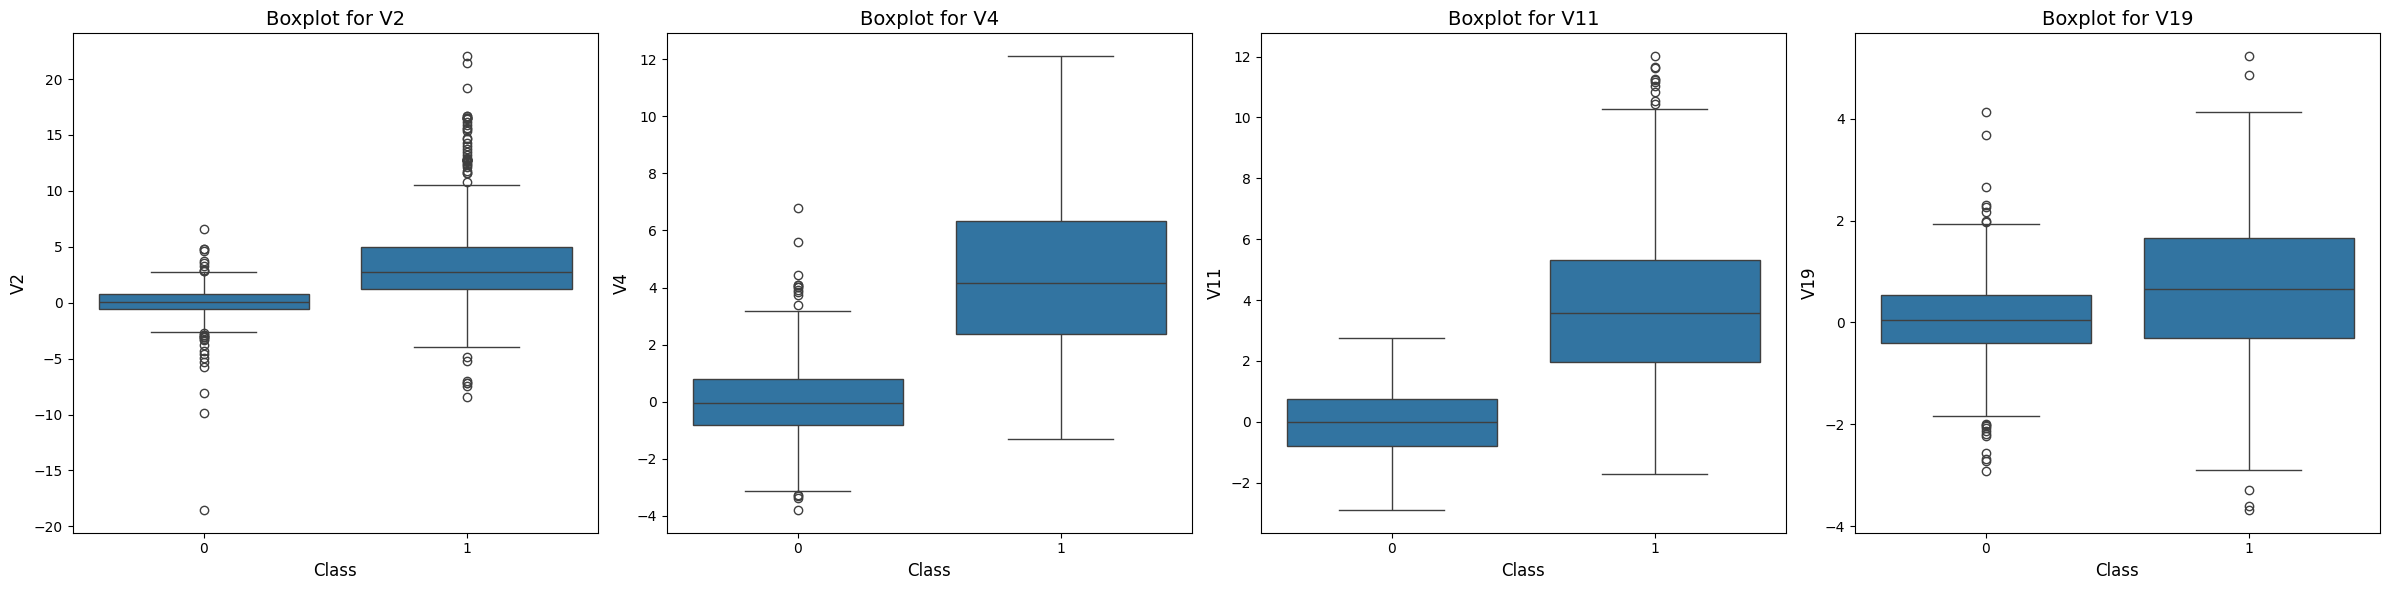

In [21]:
# Признаки с положительной корреляцией
positive_corr_features = ['V2', 'V4', 'V11', 'V19']

# Создаем фигуру и оси для 4 графиков в одной строке
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Строим boxplot для каждого признака
for idx, feature in enumerate(positive_corr_features):
    sns.boxplot(data=new_df, x='Class', y=feature, ax=axes[idx])  # Boxplot для текущего признака
    axes[idx].set_title(f"Boxplot for {feature}", fontsize=14)  # Заголовок графика
    axes[idx].set_xlabel("Class", fontsize=12)  # Подпись оси X
    axes[idx].set_ylabel(feature, fontsize=12)  # Подпись оси Y

plt.tight_layout()  # Уменьшить промежутки между графиками
plt.show()


Вывод: в обоих классах есть выбросы, которые будут мешать при кластеризации

## Обработка выбросов

Наша основная цель в этом разделе - удалить выбросы из признаков, которые имеют высокую корреляцию с целевой переменной. Это положительно скажется на точности наших моделей.


### Метод межквартильного размаха:
<ul>
<li> <b>Interquartile Range (IQR): </b> Рассчитываем разницу между 75-м процентилем и 25-м процентилем. Наша цель - создать порог за пределами 75-го и 25-го процентилей, чтобы в случае, если какой-то экземпляр выборки преодолеет этот порог, он был удален.  </li>
<li> <b>Построить Boxplots: </b> С помощью boxplot легко увидеть 25-й и 75-й процентили и выбросы. </li>
</ul>

Надо быть внимательным к тому, как далеко мы хотим установить порог для удаления выбросов. Мы определяем порог путем умножения числа (например, 1.5) на интерквартильный размах. Чем выше этот порог, тем меньше выбросов будет обнаружено, а чем ниже этот порог, тем больше выбросов будет обнаружено.  <br><br>

Мы хотим больше сосредоточиться именно на сильных выбросах, а не просто на выбросах. Почему? Потому что удалив все выбросы, мы можем столкнуться с риском потери информации, что приведет к снижению точности наших моделей.


### Итого:
<ul>
<li> <b> Строим распределения </b>  </li>
<li><b>Определяем порог </b> </li>
<li> <b>Удаляем выбросы </b> </li>
<li> <b> Строим Boxplot </b> </li>
</ul>

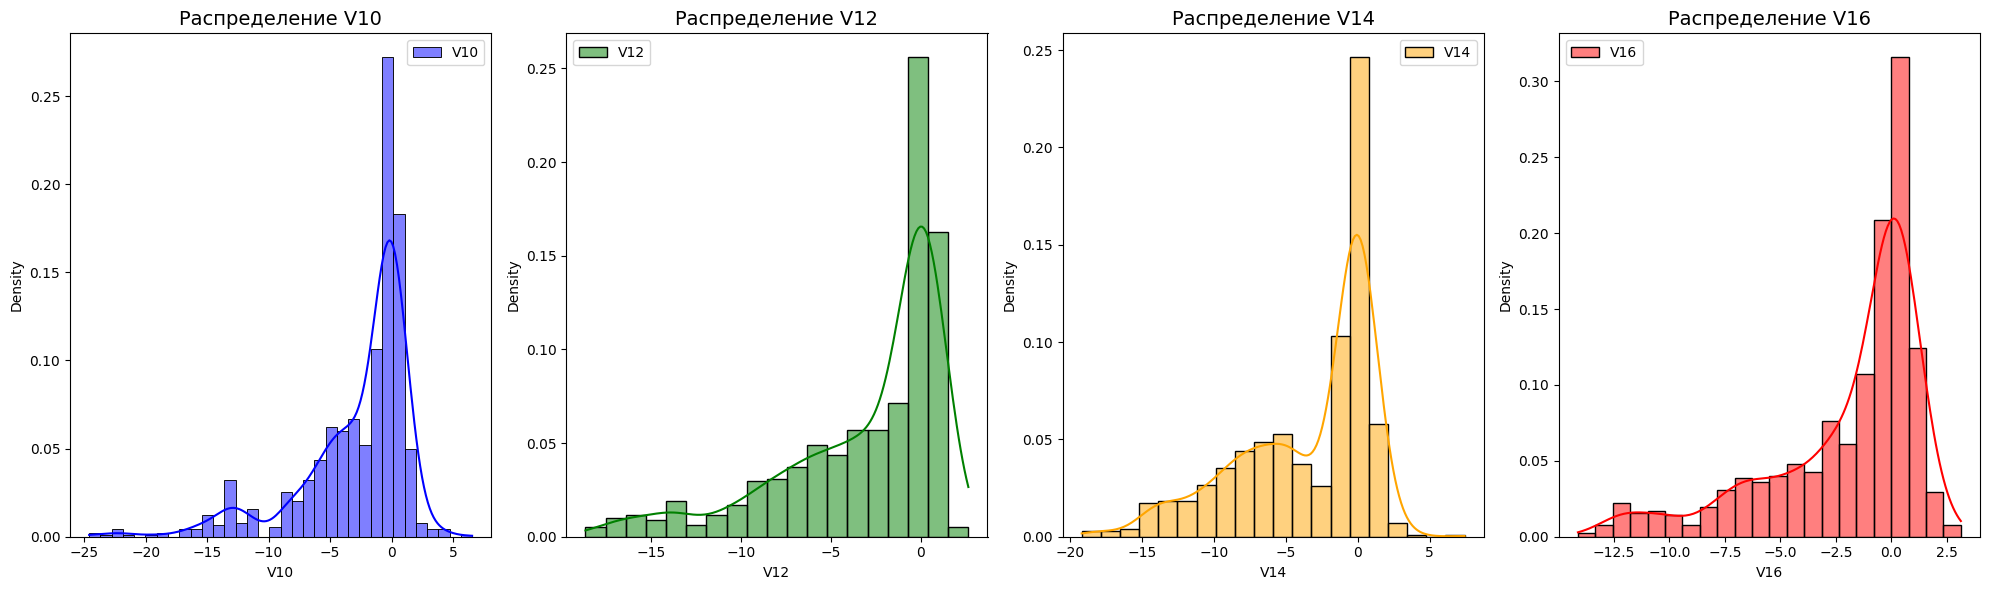

In [22]:
# Признаки с отрицательной корреляцией
negative_corr_features = ['V10', 'V12', 'V14', 'V16']

# Строим распределения
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

# Распределение для V10
sns.histplot(new_df['V10'], kde=True, stat="density", color="blue", ax=ax1, label='V10')
ax1.set_title('Распределение V10', fontsize=14)
ax1.legend()

# Распределение для V12
sns.histplot(new_df['V12'], kde=True, stat="density", color="green", ax=ax2, label='V12')
ax2.set_title('Распределение V12', fontsize=14)
ax2.legend()

# Распределение для V14
sns.histplot(new_df['V14'], kde=True, stat="density", color="orange", ax=ax3, label='V14')
ax3.set_title('Распределение V14', fontsize=14)
ax3.legend()

# Распределение для V16
sns.histplot(new_df['V16'], kde=True, stat="density", color="red", ax=ax4, label='V16')
ax4.set_title('Распределение V16', fontsize=14)
ax4.legend()

plt.tight_layout()  # Уменьшить промежутки между графиками
plt.show()

In [23]:
# Создаем копию исходного датафрейма для удаления выбросов
new_df_without_outliers = new_df.copy()

# Удаление выбросов из признаков
features = ['V10', 'V12', 'V14', 'V16']

for feature in features:
    fraud_values = new_df_without_outliers[feature].loc[new_df_without_outliers['Class'] == 1].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    print(f'Квартиль 25 для {feature}: {q25} | Квартиль 75: {q75}')

    iqr = q75 - q25
    print(f'IQR для {feature}: {iqr}')

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(f'Порог для {feature}: {cut_off}')
    print(f'{feature} нижняя граница: {lower}')
    print(f'{feature} верхняя граница: {upper}')

    outliers = [x for x in fraud_values if x < lower or x > upper]
    print(f'Количество выбросов в {feature}: {len(outliers)}')

    # Удаляем выбросы
    new_df_without_outliers = new_df_without_outliers[
        ~((new_df_without_outliers[feature] > upper) | (new_df_without_outliers[feature] < lower))
    ]
    print('----' * 20)


Квартиль 25 для V10: -7.7566982278474725 | Квартиль 75: -2.6141839131895623
IQR для V10: 5.142514314657911
Порог для V10: 7.713771471986866
V10 нижняя граница: -15.47046969983434
V10 верхняя граница: 5.099587558797303
Количество выбросов в V10: 19
--------------------------------------------------------------------------------
Квартиль 25 для V12: -8.46396612952571 | Квартиль 75: -2.82494562476694
IQR для V12: 5.63902050475877
Порог для V12: 8.458530757138156
V12 нижняя граница: -16.922496886663865
V12 верхняя граница: 5.633585132371216
Количество выбросов в V12: 13
--------------------------------------------------------------------------------
Квартиль 25 для V14: -9.414161044857002 | Квартиль 75: -4.288939281087107
IQR для V14: 5.125221763769894
Порог для V14: 7.687832645654842
V14 нижняя граница: -17.101993690511843
V14 верхняя граница: 3.3988933645677344
Количество выбросов в V14: 5
--------------------------------------------------------------------------------
Квартиль 25 для V1

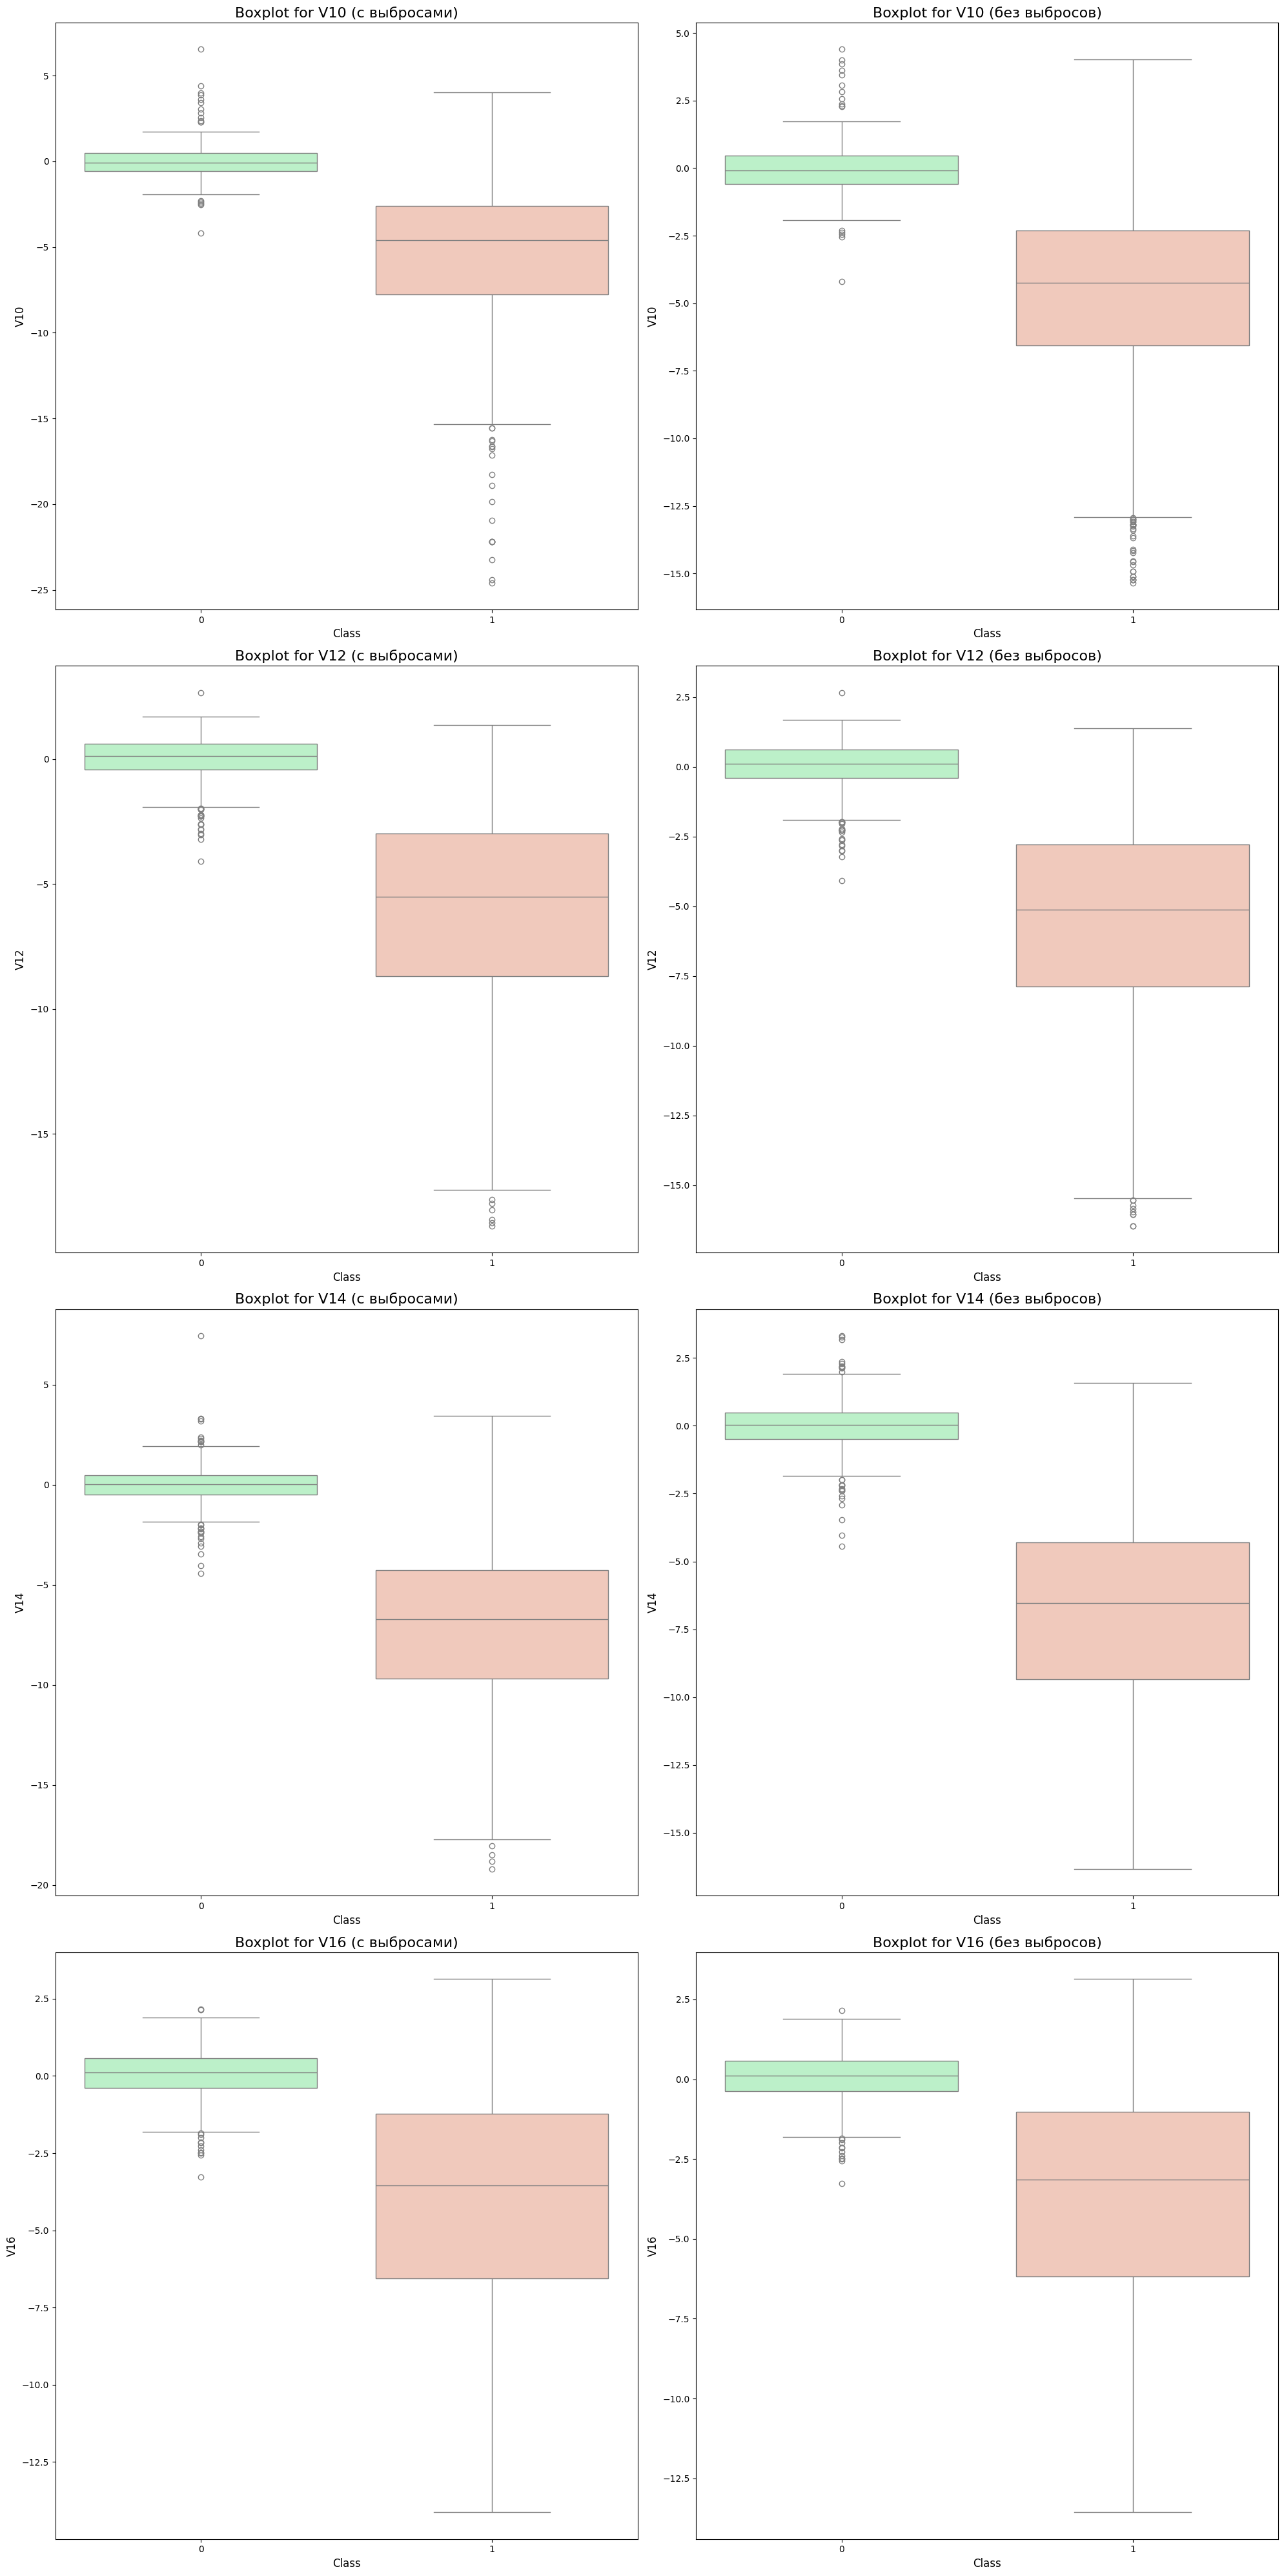

In [24]:
f, ax = plt.subplots(4, 2, figsize=(20, 40))  # 4 строки и 2 столбца для графиков

features = ['V10', 'V12', 'V14', 'V16']  # Признаки для сравнения
colors = ['#B3F9C5', '#f9c5b3']  # Цвета для графиков

for i, feature in enumerate(features):
    # Boxplot для признака с выбросами
    sns.boxplot(data=new_df, x='Class', y=feature, ax=ax[i, 0], palette=colors)
    ax[i, 0].set_title(f"Boxplot for {feature} (с выбросами)", fontsize=16)
    ax[i, 0].set_xlabel("Class", fontsize=12)
    ax[i, 0].set_ylabel(feature, fontsize=12)

    # Boxplot для признака без выбросов
    sns.boxplot(data=new_df_without_outliers, x='Class', y=feature, ax=ax[i, 1], palette=colors)
    ax[i, 1].set_title(f"Boxplot for {feature} (без выбросов)", fontsize=16)
    ax[i, 1].set_xlabel("Class", fontsize=12)
    ax[i, 1].set_ylabel(feature, fontsize=12)

plt.tight_layout()  # Уменьшаем расстояния между графиками
plt.show()

По масштабу можем заметить, что выбрасов стало меньше

In [25]:
# теперь у нас в датафрейме new_df будут лежать данные без выбросов.

new_df = new_df_without_outliers

### Понижение размерности и кластеризация

Для того, чтобы убедиться, что наши классы являются разделимыми (иначе строить модели нет смысла), выполним кластеризацию с помощью трех различных техник кластеризации.



In [26]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Подготовка данных
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X.drop(['Time', 'Amount'], axis=1, inplace=True)  # Tак как Time и Amount не коррелируют почти с таргетом

# T-SNE алгоритм
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)  # Снижение размерности до 2 для визуализации
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("T-SNE заняло {:.2f} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
pca = PCA(n_components=2, random_state=42)  # Снижение размерности до 2 для визуализации
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2f} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
svd = TruncatedSVD(n_components=2, random_state=42)  # Снижение размерности до 2 для визуализации
X_reduced_svd = svd.fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2f} сек".format(t1 - t0))


T-SNE заняло 7.63 сек
PCA заняло 0.02 сек
Truncated SVD заняло 0.08 сек


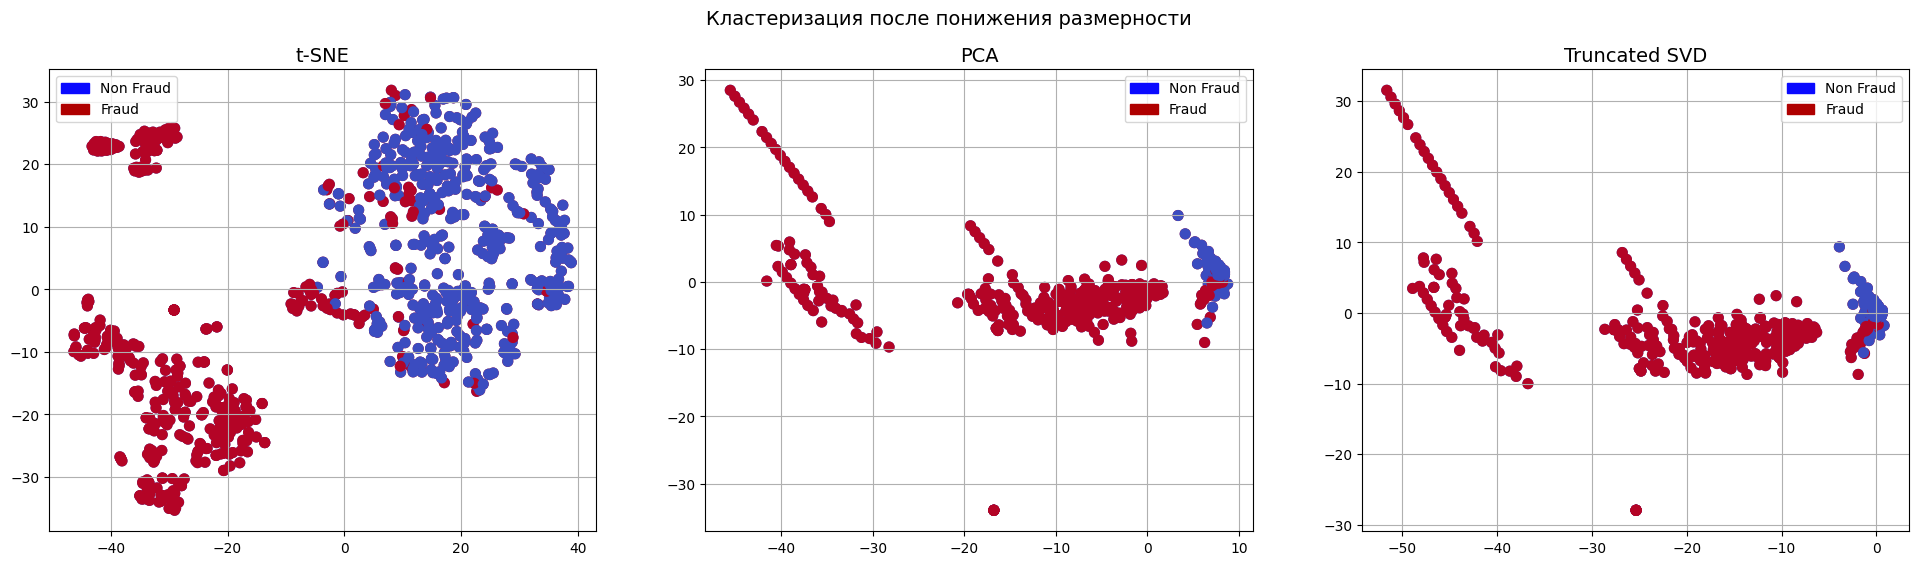

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)

# Патчи для легенды
blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()


Вывод: t-SNE достаточно хорошо разделяет классы, классы явным образом разделимы.

In [28]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')